<a href="https://colab.research.google.com/github/womega/Covid19_project/blob/master/Training%20and%20tuning/Training%20and%20tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Visualisation

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
url = 'https://github.com/womega/Covid19_project/blob/master/Training%20and%20tuning/final_dataset.csv?raw=true'
data = pd.read_csv('final_dataset_2.csv')
unlabeled = pd.read_csv('final_unlabeled.csv').drop('Domain', axis=1)

In [3]:
data.head()

,Domain,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
0,covid19testclassaction.com,7,25,0,3.593270,3.538311,3.538311,0,0.230769,0,0,0,0,1
1,symptomsofcorona-virus.com,5,25,1,3.639080,3.697846,3.697846,0,0.307692,1,0,0,0,1
2,covid19fighter.com,5,17,0,3.734522,3.664498,3.664498,0,0.388889,0,0,0,0,1
3,covid-1nine.com,5,14,1,3.235926,3.095795,3.095795,0,0.266667,0,0,1,0,1
4,latestoncaronavirus.com,6,22,0,3.572624,3.471354,3.471354,0,0.260870,1,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37794 entries, 0 to 37793
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Domain              37794 non-null  object 
 1   Num_words           37794 non-null  int64  
 2   Num_chars           37794 non-null  int64  
 3   Hyphen              37794 non-null  int64  
 4   Entropy_sdsu        37794 non-null  float64
 5   Entropy_nosdsu      37794 non-null  float64
 6   Entropy_nosu        37794 non-null  float64
 7   Tranco_Rank         37794 non-null  int64  
 8   Longest_word_ratio  37794 non-null  float64
 9   Typos               37794 non-null  int64  
 10  Freenom_TLD         37794 non-null  int64  
 11  Other_numbers       37794 non-null  int64  
 12  Subdomain levels    37794 non-null  int64  
 13  Label               37794 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 4.0+ MB


## Countplot

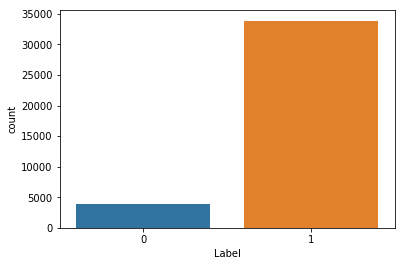

In [5]:
sns.countplot(data['Label'])

## Histograms

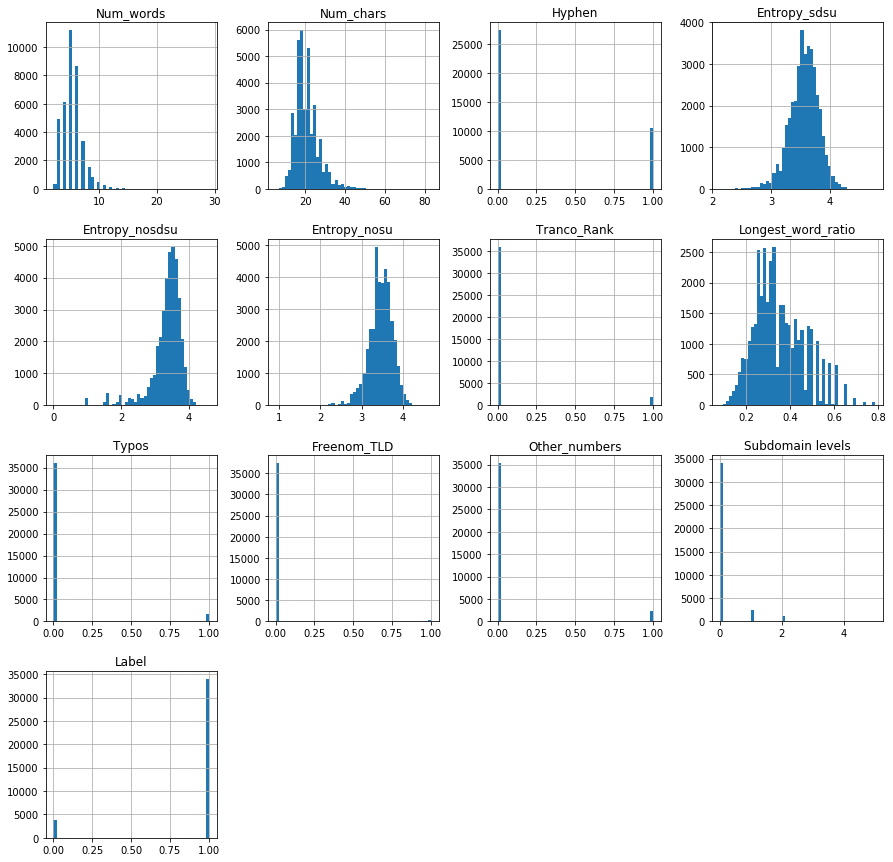

In [6]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

## Correlation heatmap

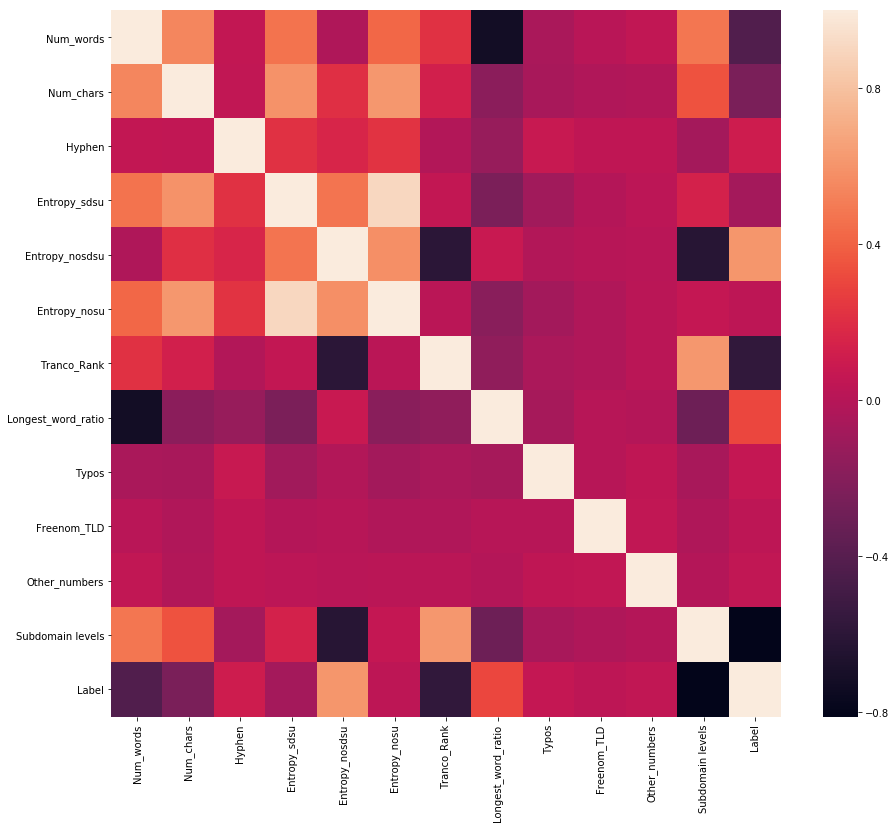

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

## Decription

In [8]:
data.describe()

,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
count,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000
mean,5.322988,20.768164,0.276076,3.558365,3.355477,3.456555,0.046965,0.351469,0.046145,0.009816,0.064508,0.137985,0.896703
std,1.726736,5.936220,0.447061,0.243522,0.459343,0.284065,0.211567,0.115365,0.209802,0.098591,0.245658,0.457127,0.304350
min,2.000000,5.000000,0.000000,2.121928,-0.000000,0.918296,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,17.000000,0.000000,3.410417,3.238901,3.288320,0.000000,0.266667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,20.000000,0.000000,3.572469,3.452820,3.471354,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,24.000000,1.000000,3.725481,3.625000,3.642150,0.000000,0.423077,0.000000,0.000000,0.000000,0.000000,1.000000
max,29.000000,83.000000,1.000000,4.762261,4.582450,4.667995,1.000000,0.785714,1.000000,1.000000,1.000000,5.000000,1.000000


# Preprocessing

In [9]:
X = data.drop(['Domain', 'Label'], axis=1)
y = data['Label']

In [10]:
X.shape, y.shape

((37794, 12), (37794,))

In [11]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['black', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
        sns.despine()
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

## Undersampling

### Default NearMiss

In [12]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

X_nearmiss, y_nearmiss = NearMiss(sampling_strategy=0.25).fit_sample(X, y)

Counter({1: 15616, 0: 3904})


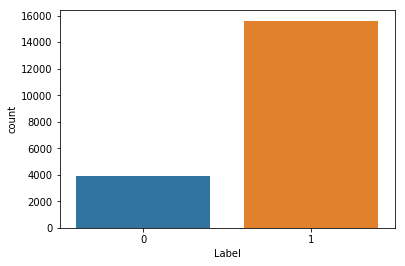

In [13]:
sns.countplot(y_nearmiss)
print(Counter(y_nearmiss))

# Algorithms

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, make_scorer
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import tree
import graphviz

In [15]:
def specificity(y_true, y_pred): 
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    neg = tn + fp
    return tn/neg

#scoring = {'f1', 'precision','accuracy', 'recall', make_scorer(specificity)}

scoring = {'f1': 'f1', 'precision': 'precision', 'accuracy': 'accuracy',
           'sensitivity': 'recall', 'specificity': make_scorer(specificity)}

In [16]:
def append_avgs(dict):
    avgs = []
    stds = []
    for i in dict:
        avg = np.average(dict[i])
        std = np.std(dict[i])
        avgs.append(avg)
        stds.append(std)
    df = pd.DataFrame(dict)
    df.loc[10] = avgs
    df.loc[11] = stds
    return df

def compare_avgs(df1, df2):
    avg_df1 = get_avg(df1)
    avg_df2 = get_avg(df2)
    # avg_ovu = get_avg(ovr_und)
    df = pd.concat([avg_df1, avg_df2], ignore_index=True)
    return df


def get_avg(df):
    # print(df.iloc[[10]].reset_index(drop=True))
    return df.iloc[[10]].reset_index(drop=True)

def draw(dict):
    folds = list(range(0,10))
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(folds,dict['test_accuracy'][:10],label='accuracy',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_precision'][:10],label = 'precision',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_f1'][:10],label = 'f1 score',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_sensitivity'][:10],label='Recall',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_specificity'][:10],label='Specificity',marker='o', linestyle='--',)
    plt.xlabel('Fold')
    plt.ylabel('Performance')
    plt.xticks(folds, folds)
    plt.legend()
    plt.show()

## Decision Tree

In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

In [18]:
# idx = np.arrange(y.shape[0])
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, idx, stratify = y, test_size=0.333333, random_state=100)

In [19]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, test_size=0.333333, random_state=100)

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


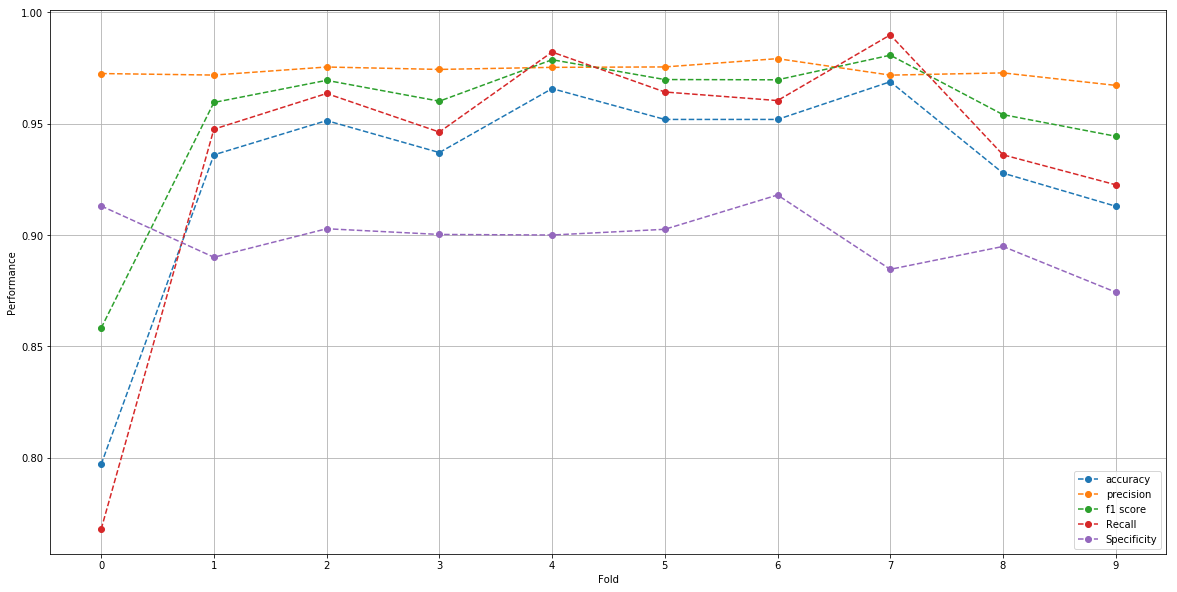

In [20]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dtc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
dtc_sc_pr = append_avgs(dtc_sc_pr)
draw(dtc_sc_pr)

In [21]:
dtc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.084947,0.014992,0.858268,0.972425,0.797131,0.768097,0.913043
1,0.083968,0.012996,0.959455,0.971748,0.935963,0.947470,0.890026
2,0.077955,0.012992,0.969384,0.975357,0.951332,0.963485,0.902813
3,0.081953,0.012993,0.960026,0.974274,0.936988,0.946188,0.900256
4,0.079954,0.011993,0.978628,0.975207,0.965676,0.982074,0.900000
5,0.074960,0.012990,0.969736,0.975389,0.951844,0.964149,0.902564
6,0.075956,0.012994,0.969619,0.979112,0.951844,0.960307,0.917949
7,0.079954,0.011994,0.980653,0.971716,0.968750,0.989757,0.884615
8,0.078955,0.013992,0.953997,0.972721,0.927766,0.935980,0.894872
9,0.083935,0.013993,0.944299,0.967114,0.912910,0.922535,0.874359


##### Single Model

In [22]:
# instantiate the model 
dtc = DecisionTreeClassifier(max_depth=5)
# fit the model 

dtc.fit(X_train_1, y_train_1)

dtc_test_pred = dtc.predict(X_test_1)

print("The DTC's classification report:\n\n",classification_report(y_test_1, dtc_test_pred))
print("The DTC's confusion matrix:\n\n",confusion_matrix(y_test_1, dtc_test_pred))

The DTC's classification report:

               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1356
           1       0.97      0.99      0.98      5151

    accuracy                           0.97      6507
   macro avg       0.97      0.94      0.95      6507
weighted avg       0.97      0.97      0.97      6507

The DTC's confusion matrix:

 [[1219  137]
 [  53 5098]]


In [23]:
dtc_preds = dtc.predict(unlabeled)

In [24]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X.columns,
                                class_names=["whitelist","malicious"],
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('test-output/decision_tree.gv', view=True)

'test-output\\decision_tree.gv.pdf'

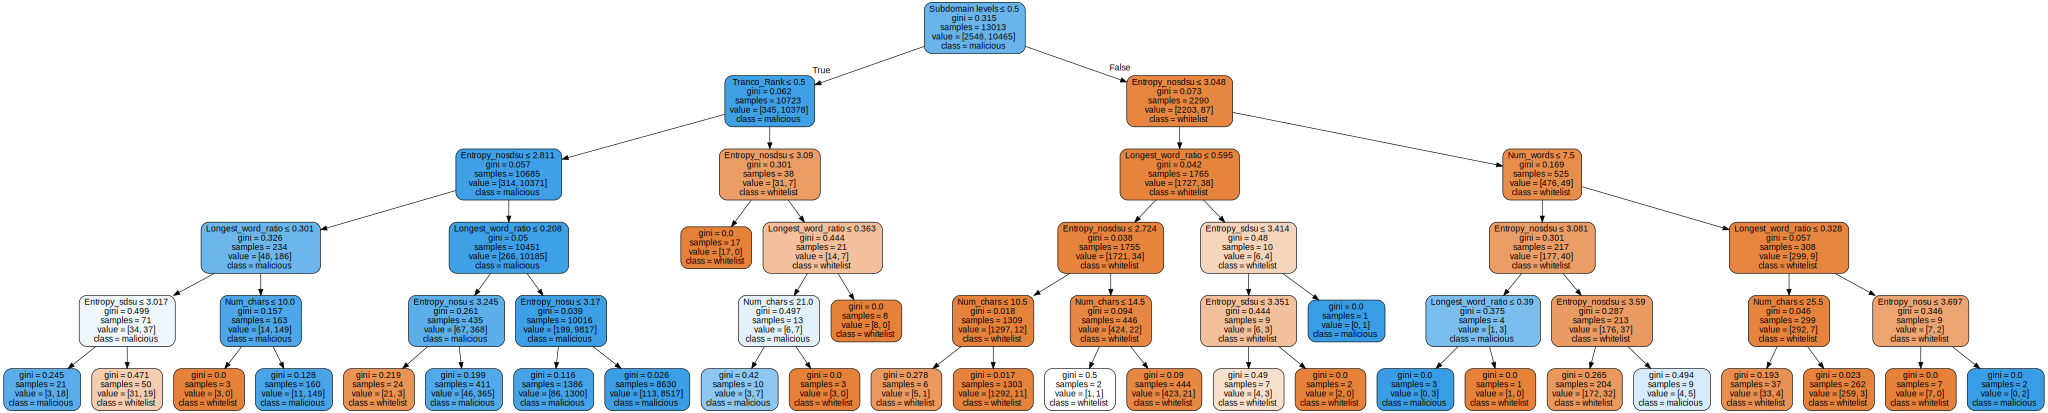

In [25]:
graph

###### Feature importance

Feature ranking:
1. Subdomain levels (0.950181)
2. Tranco_Rank (0.013638)
3. Longest_word_ratio (0.011131)
4. Entropy_nosu (0.010263)
5. Entropy_nosdsu (0.007996)
6. Num_chars (0.002647)
7. Entropy_sdsu (0.002360)
8. Num_words (0.001784)
9. Other_numbers (0.000000)
10. Freenom_TLD (0.000000)
11. Typos (0.000000)
12. Hyphen (0.000000)


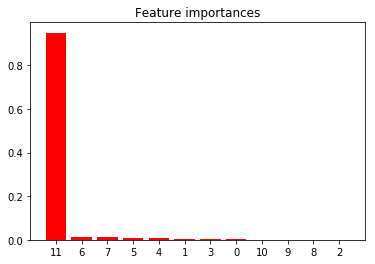

In [26]:
importances = dtc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

In [27]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), DecisionTreeClassifier())
dtc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
dtc_sc = append_avgs(dtc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


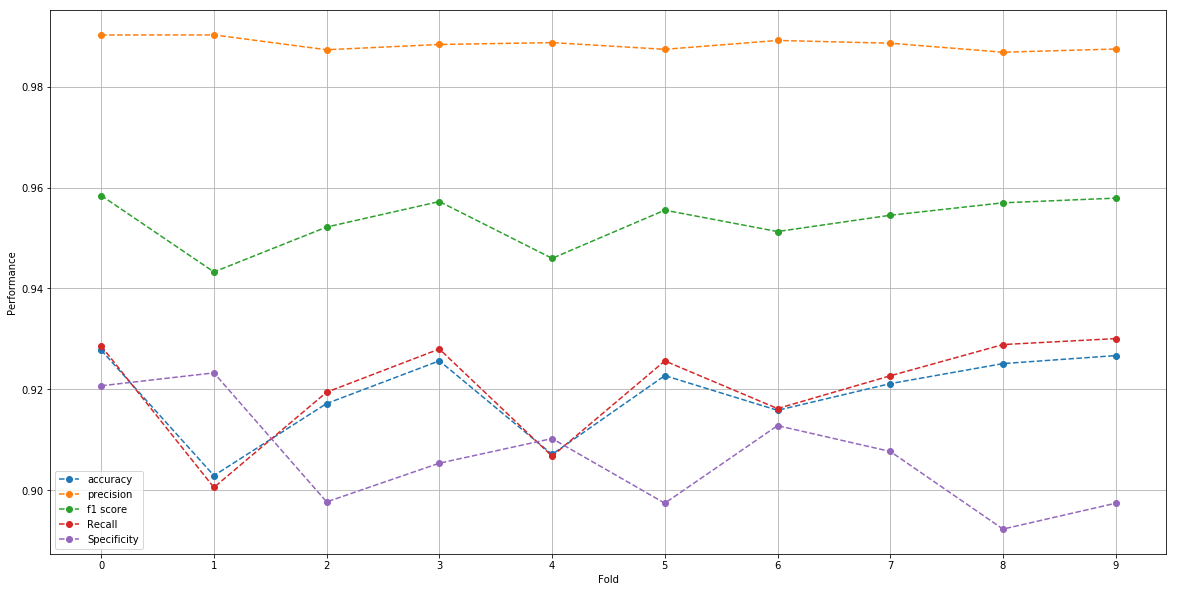

In [28]:
draw(dtc_sc)

#### Compare averages

In [29]:
compare_avgs(dtc_sc, dtc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.491120,0.024386,0.953333,0.988445,0.91922,0.920685,0.906501
1,0.080254,0.013193,0.954407,0.973506,0.93002,0.938004,0.898050


### Tuned

## Random Forest

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


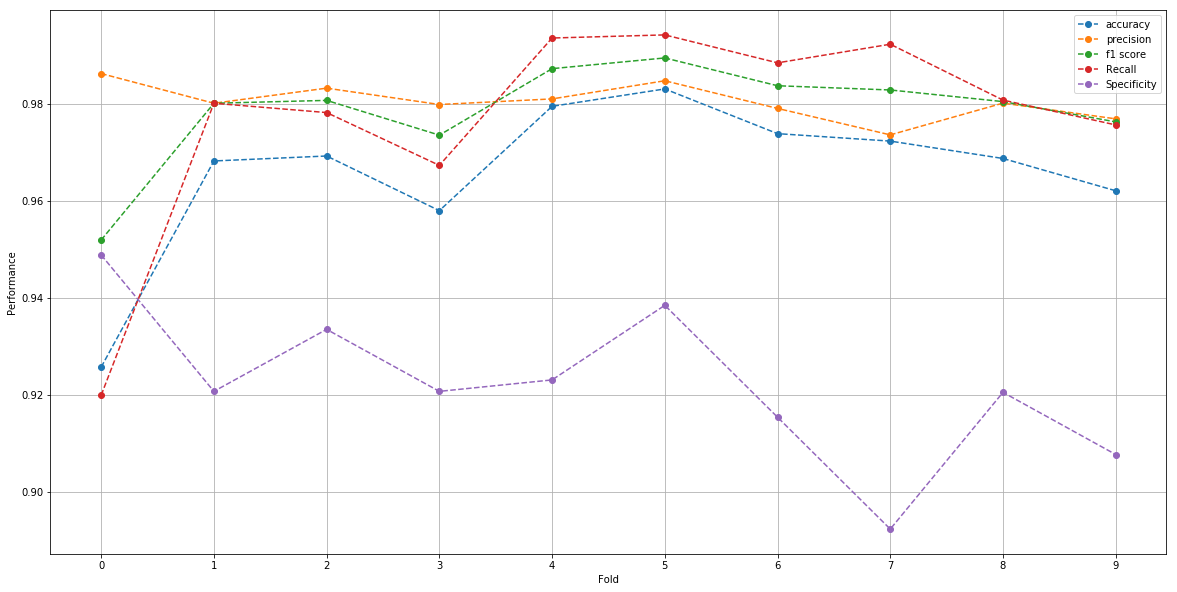

In [31]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
rfc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
rfc_sc_pr = append_avgs(rfc_sc_pr)
draw(rfc_sc_pr)

In [32]:
rfc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.601063,0.059966,0.951939,0.986264,0.925717,0.919923,0.948849
1,1.579095,0.062963,0.980141,0.980141,0.968238,0.980141,0.920716
2,1.530119,0.056967,0.980732,0.983258,0.969262,0.978219,0.933504
3,1.568100,0.056983,0.973565,0.979883,0.957992,0.967329,0.920716
4,1.562103,0.055968,0.987277,0.981037,0.979508,0.993598,0.923077
5,1.598066,0.079954,0.989487,0.984781,0.983094,0.994238,0.938462
6,1.556138,0.056952,0.983753,0.979074,0.973873,0.988476,0.915385
7,1.587105,0.054967,0.982879,0.973618,0.972336,0.992318,0.892308
8,1.558089,0.055968,0.980480,0.980166,0.968750,0.980794,0.920513
9,1.577097,0.056964,0.976297,0.976923,0.962090,0.975672,0.907692


##### Single Model

In [33]:
# instantiate the model 
rfc = RandomForestClassifier()
# fit the model 

rfc.fit(X_train_1, y_train_1)

rfc_test_pred = rfc.predict(X_test_1)

print("The DTC's classification report:\n\n",classification_report(y_test_1, rfc_test_pred))
print("The DTC's confusion matrix:\n\n",confusion_matrix(y_test_1, rfc_test_pred))

The DTC's classification report:

               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1356
           1       0.98      0.99      0.98      5151

    accuracy                           0.97      6507
   macro avg       0.96      0.96      0.96      6507
weighted avg       0.97      0.97      0.97      6507

The DTC's confusion matrix:

 [[1263   93]
 [  74 5077]]


In [34]:
rfc_preds = rfc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Subdomain levels (0.346310)
2. Entropy_nosdsu (0.222491)
3. Tranco_Rank (0.113801)
4. Num_chars (0.081921)
5. Num_words (0.076785)
6. Longest_word_ratio (0.060236)
7. Entropy_sdsu (0.047766)
8. Entropy_nosu (0.045280)
9. Hyphen (0.003188)
10. Other_numbers (0.001402)
11. Typos (0.000819)
12. Freenom_TLD (0.000000)


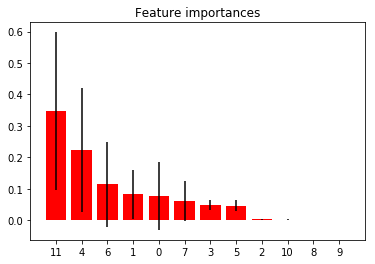

In [35]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

In [36]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), RandomForestClassifier())
rfc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
rfc_sc = append_avgs(rfc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


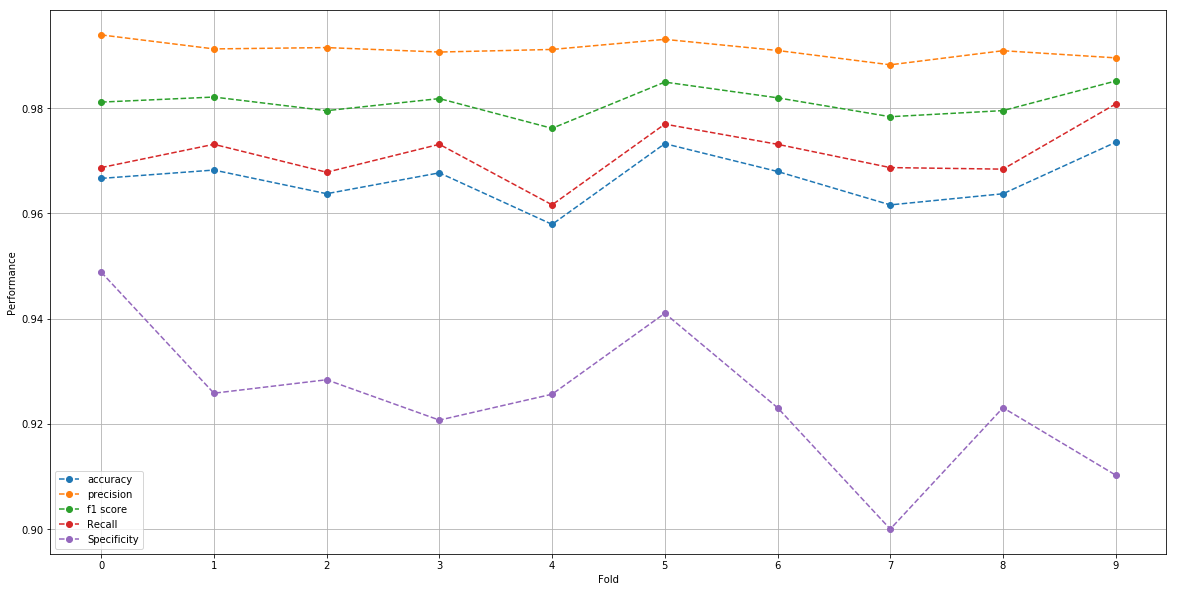

In [37]:
draw(rfc_sc)

#### Compare averages

In [38]:
compare_avgs(rfc_sc, rfc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.987961,0.096340,0.981097,0.991150,0.966450,0.971260,0.924686
1,1.571697,0.059765,0.978655,0.980515,0.966086,0.977071,0.922122


### Tuned

## XGBoost

In [39]:
# XGboost classifier
from xgboost import XGBClassifier, plot_importance

H:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
H:\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


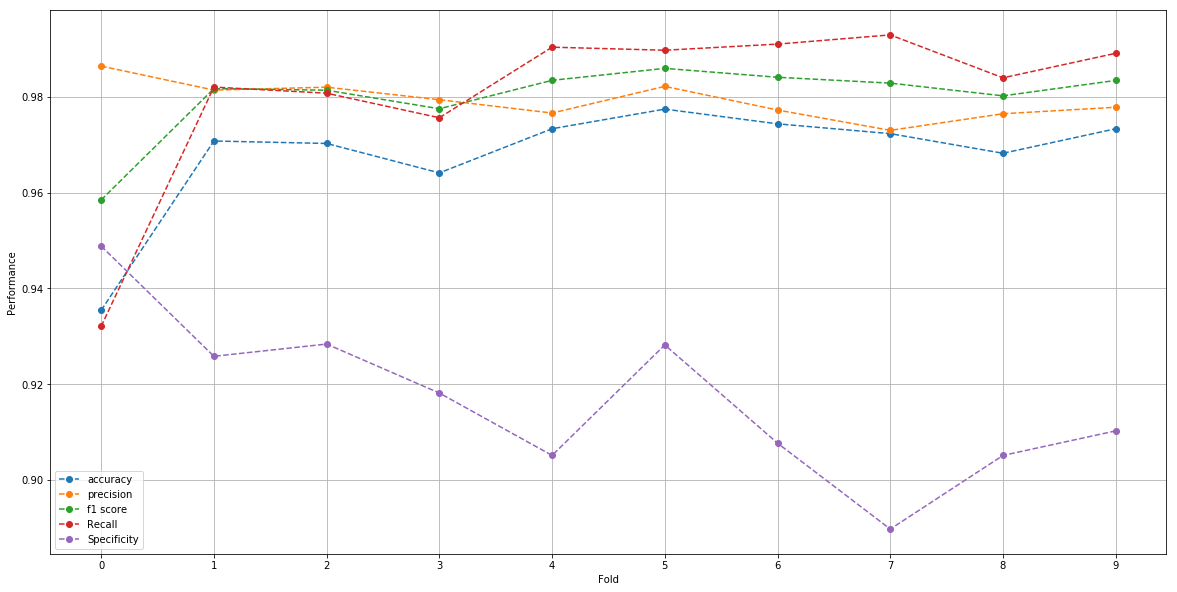

In [40]:
clf = make_pipeline(StandardScaler(), XGBClassifier())
xgb_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
xgb_sc_pr = append_avgs(xgb_sc_pr)
draw(xgb_sc_pr)

In [41]:
xgb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.741888,0.033981,0.958498,0.986441,0.935451,0.932095,0.948849
1,0.532693,0.032981,0.981748,0.981434,0.970799,0.982063,0.925831
2,0.510707,0.033980,0.981410,0.982040,0.970287,0.980782,0.928389
3,0.662620,0.030982,0.977535,0.979421,0.964139,0.975657,0.918159
4,0.519702,0.035980,0.983471,0.976641,0.973361,0.990397,0.905128
5,0.547686,0.036978,0.985969,0.982211,0.977459,0.989757,0.928205
6,0.542688,0.031981,0.984107,0.977273,0.974385,0.991037,0.907692
7,0.538691,0.033980,0.982890,0.973024,0.972336,0.992958,0.889744
8,0.548685,0.033980,0.980230,0.976493,0.968238,0.983995,0.905128
9,0.535693,0.033979,0.983450,0.977848,0.973361,0.989117,0.910256


##### Single Model

In [42]:
# instantiate the model 
xgb = XGBClassifier()
# fit the model 

xgb.fit(X_train_1, y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
xgb_preds = xgb.predict(unlabeled)

###### Feature importance

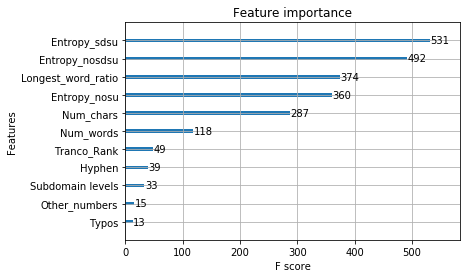

In [44]:
plot_importance(xgb)

Feature ranking:
1. Subdomain levels (0.954668)
2. Tranco_Rank (0.012763)
3. Num_words (0.005615)
4. Entropy_nosdsu (0.005398)
5. Longest_word_ratio (0.003676)
6. Hyphen (0.003471)
7. Num_chars (0.003411)
8. Entropy_sdsu (0.003200)
9. Typos (0.003105)
10. Entropy_nosu (0.002540)
11. Other_numbers (0.002153)
12. Freenom_TLD (0.000000)


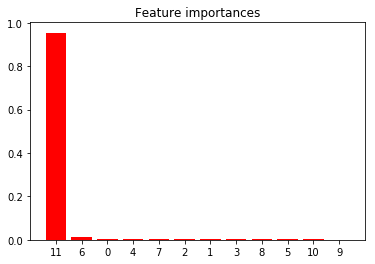

In [45]:
importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


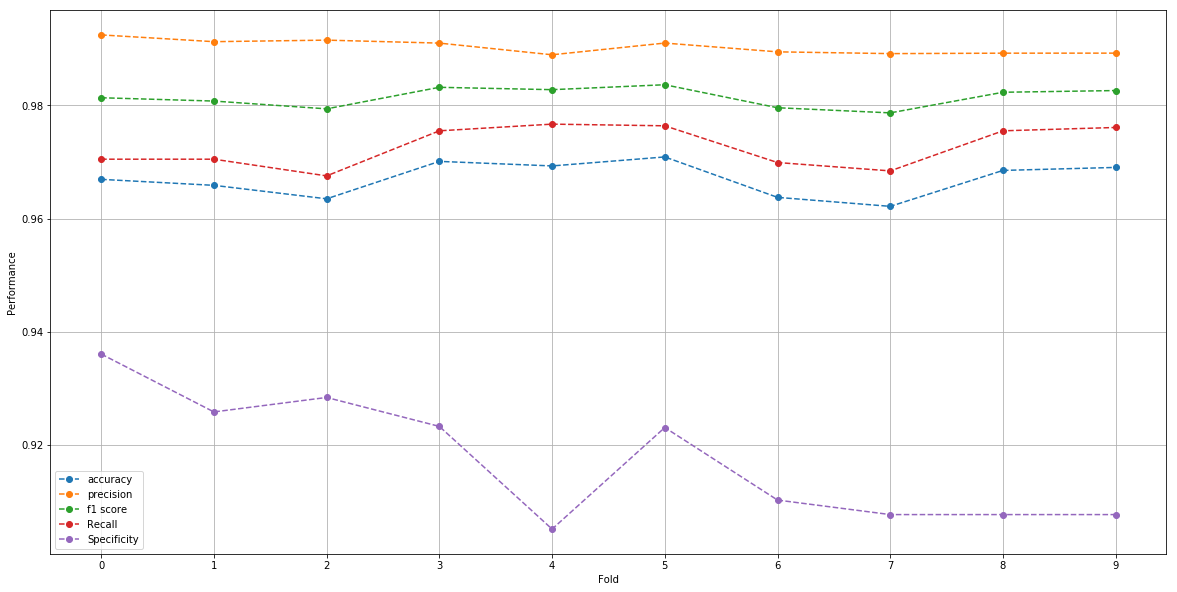

In [46]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), XGBClassifier())
xgb_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
xgb_sc = append_avgs(xgb_sc)

draw(xgb_sc)

#### Compare averages

In [47]:
compare_avgs(xgb_sc, xgb_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.976937,0.050171,0.981434,0.990329,0.967005,0.972706,0.917509
1,0.568105,0.033880,0.979931,0.979283,0.967982,0.980786,0.916738


### Tuned

## GBC

In [48]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


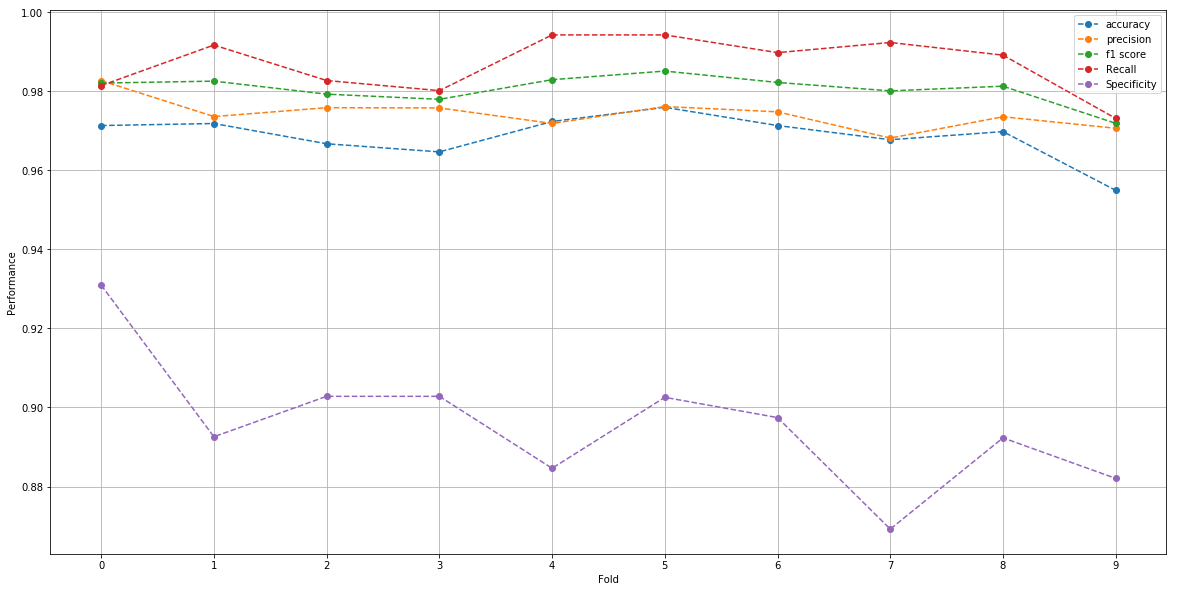

In [49]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier())
gb_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
gb_sc_pr = append_avgs(gb_sc_pr)
draw(gb_sc_pr)

##### Single Model

In [50]:
# instantiate the model 
gbc = GradientBoostingClassifier()
# fit the model 

gbc.fit(X_train_1, y_train_1)

GradientBoostingClassifier()

In [51]:
gbc_preds = gbc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Subdomain levels (0.925859)
2. Longest_word_ratio (0.016737)
3. Entropy_nosdsu (0.015985)
4. Tranco_Rank (0.014276)
5. Entropy_nosu (0.010391)
6. Num_words (0.006541)
7. Entropy_sdsu (0.004726)
8. Num_chars (0.004540)
9. Typos (0.000676)
10. Other_numbers (0.000243)
11. Hyphen (0.000025)
12. Freenom_TLD (0.000000)


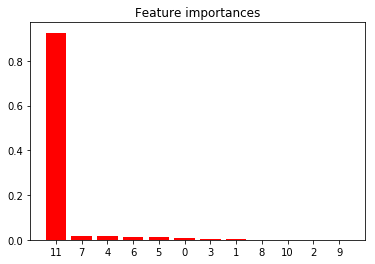

In [52]:
importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


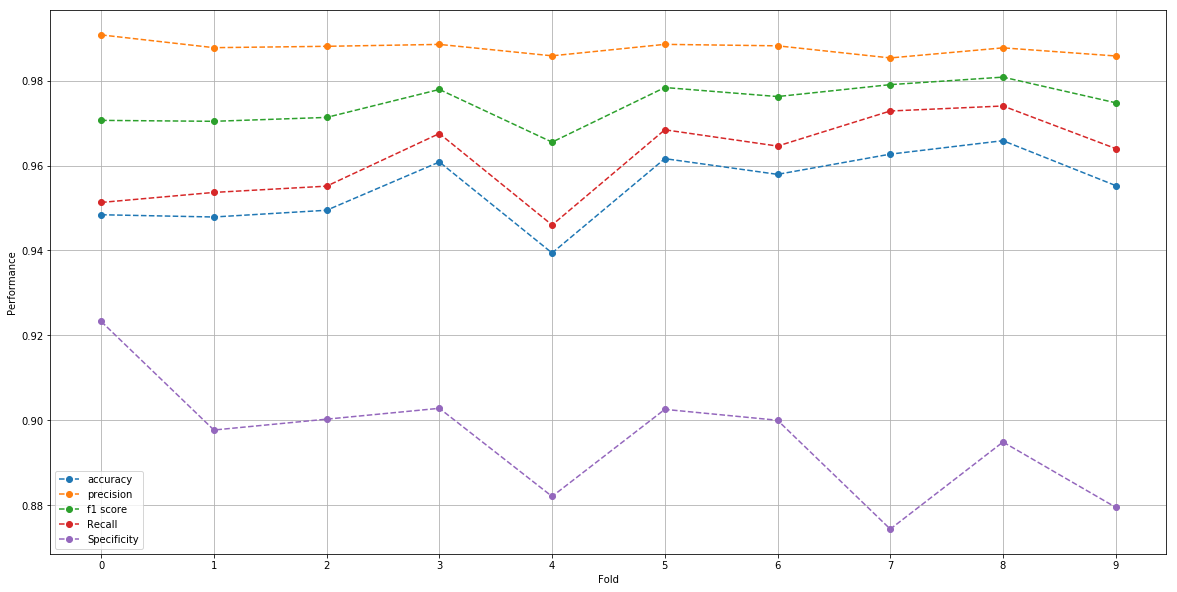

In [53]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), GradientBoostingClassifier())
gb_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
gb_sc = append_avgs(gb_sc)

draw(gb_sc)

#### Compare averages

In [54]:
compare_avgs(gb_sc, gb_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,2.218331,0.025480,0.974519,0.987672,0.954940,0.961759,0.895737
1,1.876825,0.017089,0.980523,0.974290,0.968648,0.986872,0.895736


### Tuned

## Perceptron

In [55]:
from sklearn.neural_network import MLPClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, n

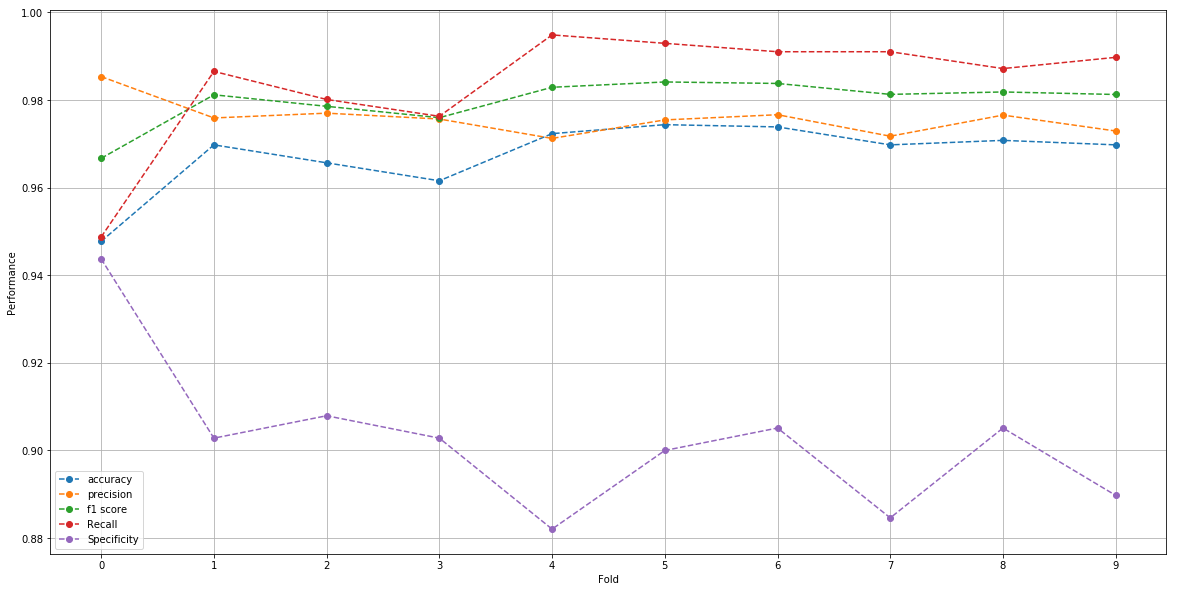

In [56]:
clf = make_pipeline(StandardScaler(), MLPClassifier())
mlp_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
mlp_sc_pr = append_avgs(mlp_sc_pr)
draw(mlp_sc_pr)

In [57]:
# instantiate the model 
mlp = make_pipeline(StandardScaler(), MLPClassifier())
# fit the model 

mlp.fit(X_train_1, y_train_1)

mlp_test_pred = mlp.predict(X_test_1)

print("The MLP's classification report:\n\n", classification_report(y_test_1, mlp_test_pred))
print("The MLP's confusion matrix:\n\n", confusion_matrix(y_test_1, mlp_test_pred))
print("Recall: ", recall_score(y_test_1, mlp_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, mlp_test_pred))
print("Specificity: ", specificity(y_test_1, mlp_test_pred))
print("F-1: ", f1_score(y_test_1, mlp_test_pred))

The MLP's classification report:

               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1356
           1       0.98      0.99      0.98      5151

    accuracy                           0.97      6507
   macro avg       0.96      0.95      0.96      6507
weighted avg       0.97      0.97      0.97      6507

The MLP's confusion matrix:

 [[1242  114]
 [  75 5076]]
Recall:  0.9854397204426325
Accuracy:  0.970954356846473
Specificity:  0.915929203539823
F-1:  0.9817232375979111


In [58]:
mlp_preds = mlp.predict(unlabeled)

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\

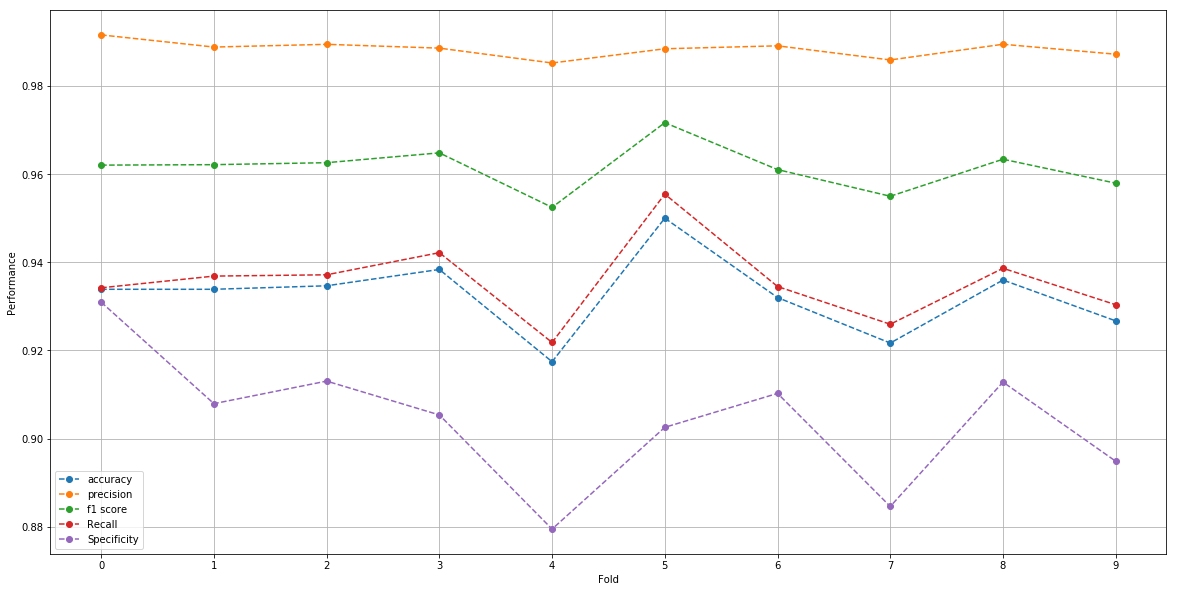

In [59]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), MLPClassifier())
mlp_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
mlp_sc = append_avgs(mlp_sc)

draw(mlp_sc)

#### Compare averages

In [60]:
compare_avgs(mlp_sc, mlp_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,25.363895,0.030084,0.961283,0.988338,0.932449,0.935704,0.904190
1,24.677714,0.018894,0.979775,0.975860,0.967572,0.983860,0.902396


### Tuned

## SVM

In [61]:
from sklearn.svm import SVC

### Baseline

#### Previously Undersampled

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


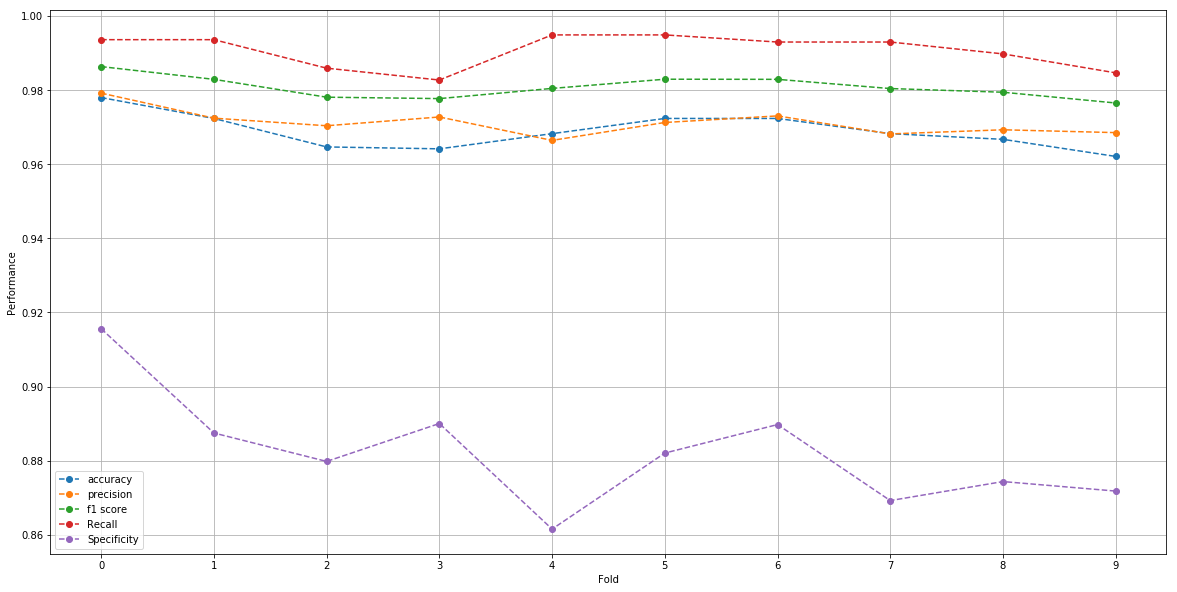

In [62]:
clf = make_pipeline(StandardScaler(), SVC(verbose=1))
svc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
svc_sc_pr = append_avgs(svc_sc_pr)
draw(svc_sc_pr)

##### Single Model

In [63]:
# instantiate the model 
svc = SVC(kernel='linear')
# fit the model 

svc.fit(X_train_1, y_train_1)

SVC(kernel='linear')

In [64]:
svc_preds = svc.predict(unlabeled)

###### Feature importance

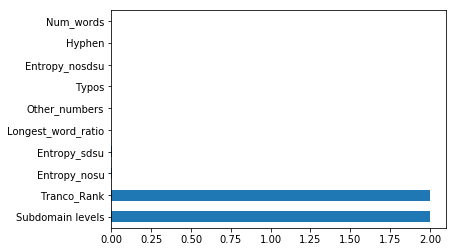

In [65]:
pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [66]:
svc.coef_

array([[-1.58475104e-04, -3.52138968e-05, -1.64912290e-04,
        -1.44781972e-03,  1.87367112e-04,  2.88929170e-03,
        -2.00066950e+00,  9.92323915e-04, -4.46141382e-04,
         0.00000000e+00, -5.32120155e-04, -2.00116119e+00]])

#### Undersampled in pipeline

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


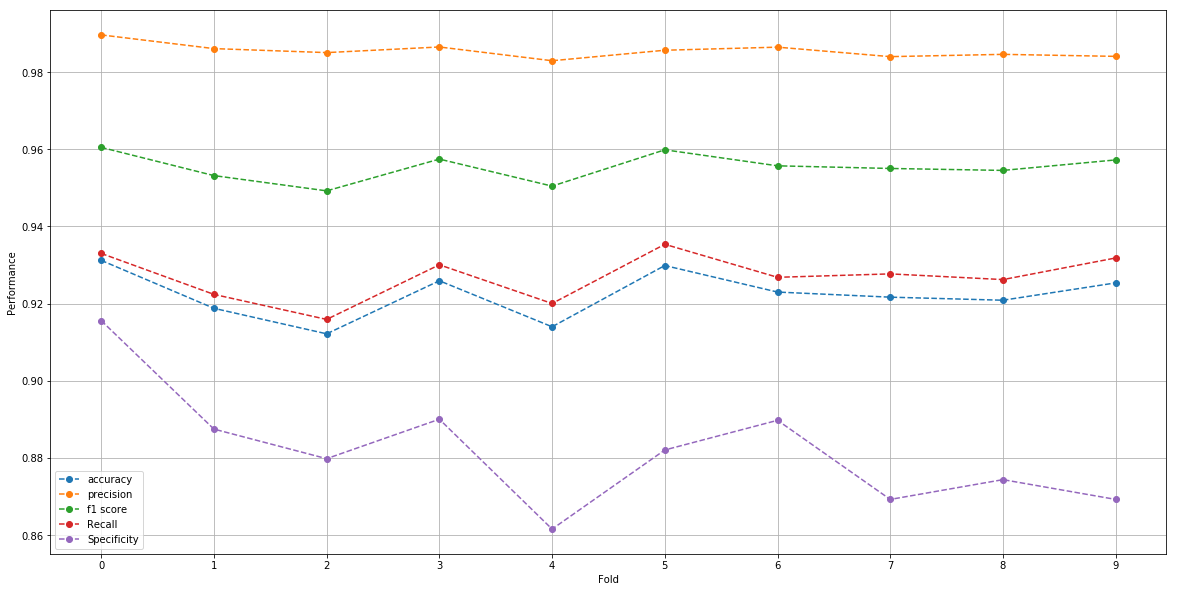

In [67]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), SVC(verbose=1))
svc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
svc_sc = append_avgs(svc_sc)

draw(svc_sc)

#### Compare averages

In [68]:
compare_avgs(svc_sc, svc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,2.671435,0.181399,0.955333,0.985536,0.922289,0.926940,0.881904
1,2.209061,0.100751,0.980756,0.971133,0.968904,0.990586,0.882161


### Tuned

In [72]:
ul = pd.read_csv('unlabeled_predictions_2.csv')
dtc_preds = pd.Series(dtc_preds, name='Labeled dtc_sd')
rfc_preds = pd.Series(rfc_preds, name='Labeled rfc_sd')
xgb_preds = pd.Series(xgb_preds, name='Labeled xgb_sd')
gbc_preds = pd.Series(gbc_preds, name='Labeled gbc_sd')
mlp_preds = pd.Series(mlp_preds, name='Labeled mlp_sd')
svc_preds = pd.Series(svc_preds, name='Labeled svc_sd')

In [73]:
df = pd.concat([ul, dtc_preds, rfc_preds, xgb_preds, gbc_preds, mlp_preds, svc_preds], axis=1)
df.to_csv('unlabeled_predictions_2.csv', index=False, header=True)

## Semi-supervised

In [74]:
from sklearn.metrics import make_scorer
unlabeled = pd.read_csv('final_unlabeled.csv')

In [75]:
def specificity(y_true, y_pred): 
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    neg = tn + fp
    return tn/neg

scoring = {'f1': 'f1', 'accuracy': 'accuracy',
           'sensitivity': 'recall', 'specificity': make_scorer(specificity)}

In [76]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, test_size=0.333333, random_state=100)

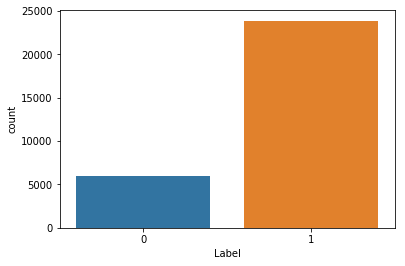

In [77]:
sns.countplot(y_nearmiss)

In [78]:
print(len(X_nearmiss))
print(len(unlabeled))

29855
365383


In [79]:
unlabeled_50 = unlabeled[29855:29855+29855].drop(['Domain'], axis=1)

In [80]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while (len(high_prob) > 0):
        
    # Fit classifier and make train/test predictions
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=13))
    clf.fit(X_train_1, y_train_1)
    y_hat_train = clf.predict(X_train_1)
    y_hat_test = clf.predict(X_test_1)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_precision = precision_score(y_train_1, y_hat_train)
    test_precision = precision_score(y_test_1, y_hat_test)
    
    train_f1 = f1_score(y_train_1, y_hat_train)
    test_f1 = f1_score(y_test_1, y_hat_test)
    
    train_sensitivity = recall_score(y_train_1, y_hat_train)
    test_sensitivity = recall_score(y_test_1, y_hat_test)
    
    train_accuracy = accuracy_score(y_train_1, y_hat_train)
    test_accuracy = accuracy_score(y_test_1, y_hat_test)
    
    train_specificity = specificity(y_train_1, y_hat_train)
    test_specificity = specificity(y_test_1, y_hat_test)
    
    print(f"Iteration {iterations}")
    print(f"Train precision: {train_precision}")
    print(f"Test precision: {test_precision}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    print(f"Train accuracy: {train_accuracy}")
    print(f"Test accuracy: {test_accuracy}")
    print(f"Train sensitivity: {train_sensitivity}")
    print(f"Test sensitivity: {test_sensitivity}")
    print(f"Train specificity: {train_specificity}")
    print(f"Test specificity: {test_specificity}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    
    if len(unlabeled_50):
        # Generate predictions and probabilities for unlabeled data
        print(f"Now predicting labels for unlabeled data...")

        pred_probs = clf.predict_proba(unlabeled_50)
        preds = clf.predict(unlabeled_50)
        prob_0 = pred_probs[:,0]
        prob_1 = pred_probs[:,1]

        # Store predictions and probabilities in dataframe
        df_pred_prob = pd.DataFrame([])
        df_pred_prob['preds'] = preds
        df_pred_prob['prob_0'] = prob_0
        df_pred_prob['prob_1'] = prob_1
        df_pred_prob.index = unlabeled_50.index

        # Separate predictions with > 99% probability
        high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                               df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                              axis=0)

        print(f"{len(high_prob)} high-probability predictions added to training data.")

        pseudo_labels.append(len(high_prob))

        # Add pseudo-labeled data to training data
        X_train_1 = pd.concat([X_train_1, unlabeled_50.loc[high_prob.index]], axis=0)
        y_train_1 = pd.concat([y_train_1, high_prob.preds])      

        # Drop pseudo-labeled instances from unlabeled data
        unlabeled_50 = unlabeled_50.drop(index=high_prob.index)
        print(f"{len(unlabeled_50)} unlabeled instances remaining.\n")
    
        # Update iteration counter
        iterations += 1
    else:
        break

Iteration 0
Train precision: 0.9751659700024589
Test precision: 0.9679872439592788
Train f1: 0.9860765788165092
Test f1: 0.9786099572199144
Train accuracy: 0.9774908305280611
Test accuracy: 0.9653336012861736
Train sensitivity: 0.9972340960523007
Test sensitivity: 0.9894684052156469
Train specificity: 0.8988735919899875
Test specificity: 0.867914979757085
Now predicting labels for unlabeled data...
26283 high-probability predictions added to training data.
3572 unlabeled instances remaining.

Iteration 1
Train precision: 0.9705806717070411
Test precision: 0.9625486381322957
Train f1: 0.9835305154531714
Test f1: 0.977283950617284
Train accuracy: 0.9863161997141991
Test accuracy: 0.9630225080385852
Train sensitivity: 0.9968305953198457
Test sensitivity: 0.9924774322968907
Train specificity: 0.9790130251330031
Test specificity: 0.8441295546558705
Now predicting labels for unlabeled data...
729 high-probability predictions added to training data.
2843 unlabeled instances remaining.

Iterat